In [21]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# For machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
srms = pd.read_csv("/content/Student_Performance.csv")
srms.head()

,Student_id,Age,Gender,School_type,Parent_education,study_hours,Attendance_percentage,Internet_access,Travel_time,Extra_activities,Study_method,Math_score,Science_score,English_score,Overall_score,Final_grade
0,1,14,Male,Public,Post Graduate,3.1,84.3,yes,<15 min,Yes,Notes,42.7,55.4,57.0,53.1,E
1,2,18,Female,Public,Graduate,3.7,87.8,yes,>60 min,No,Textbook,57.6,68.8,64.8,61.3,D
2,3,17,Female,Private,Post Graduate,7.9,65.5,no,<15 min,No,Notes,84.8,95.0,79.2,89.6,B
3,4,16,Other,Public,High School,1.1,58.1,no,15-30 min,No,Notes,44.4,27.5,54.7,41.6,E
4,5,16,Female,Public,High School,1.3,61.0,yes,30-60 min,Yes,Group study,8.9,32.7,30.0,25.4,F


In [24]:
# list all the columns in the DataFrame
print(srms.columns.tolist())

['Student_id', 'Age', 'Gender', 'School_type', 'Parent_education', 'study_hours', 'Attendance_percentage', 'Internet_access', 'Travel_time', 'Extra_activities', 'Study_method', 'Math_score', 'Science_score', 'English_score', 'Overall_score', 'Final_grade']


In [25]:
srms.isnull().sum()

,0
Student_id,0
Age,0
Gender,0
School_type,0
Parent_education,0
study_hours,0
Attendance_percentage,0
Internet_access,0
Travel_time,0
Extra_activities,0


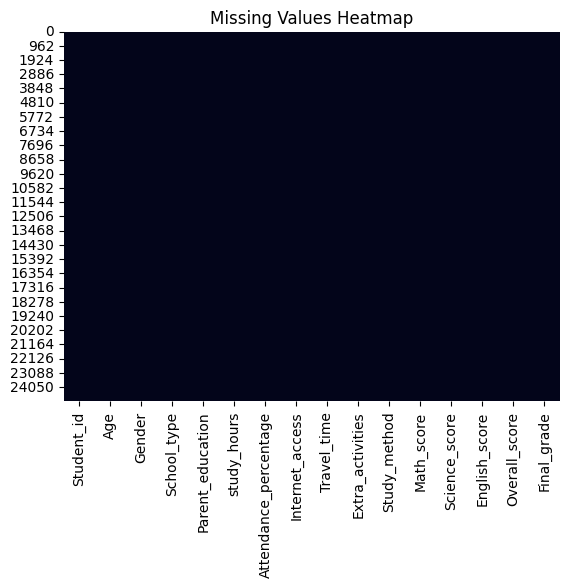

In [26]:
# heap map for missing values
sns.heatmap(srms.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [27]:
srms.info()
srms.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_id             25000 non-null  int64  
 1   Age                    25000 non-null  int64  
 2   Gender                 25000 non-null  object 
 3   School_type            25000 non-null  object 
 4   Parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   Attendance_percentage  25000 non-null  float64
 7   Internet_access        25000 non-null  object 
 8   Travel_time            25000 non-null  object 
 9   Extra_activities       25000 non-null  object 
 10  Study_method           25000 non-null  object 
 11  Math_score             25000 non-null  float64
 12  Science_score          25000 non-null  float64
 13  English_score          25000 non-null  float64
 14  Overall_score          25000 non-null  float64
 15  Fi

,Student_id,Age,study_hours,Attendance_percentage,Math_score,Science_score,English_score,Overall_score
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,4.253224,75.084084,63.785944,63.745320,63.681948,64.006172
std,4323.56215,1.703895,2.167541,14.373171,20.875262,20.970529,20.792693,18.932025
min,1.00000,14.000000,0.500000,50.000000,0.000000,0.000000,0.000000,14.500000
25%,3743.75000,15.000000,2.400000,62.800000,48.300000,48.200000,48.300000,49.000000
50%,7461.50000,16.000000,4.300000,75.100000,64.100000,64.100000,64.200000,64.200000
75%,11252.00000,18.000000,6.100000,87.500000,80.000000,80.000000,80.000000,79.000000
max,15000.00000,19.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [28]:
def risk_label(grade):
    if grade in ['A', 'B', 'C']:
        return 1
    else:
        return 0

srms['Risk'] = srms['Final_grade'].apply(risk_label)
srms.drop(columns=['Final_grade'], inplace=True)

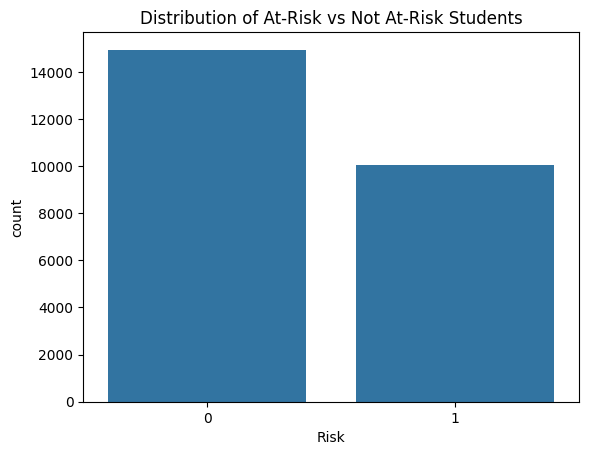

In [29]:
# EDA
sns.countplot(x='Risk', data=srms)
plt.title("Distribution of At-Risk vs Not At-Risk Students")
plt.show()

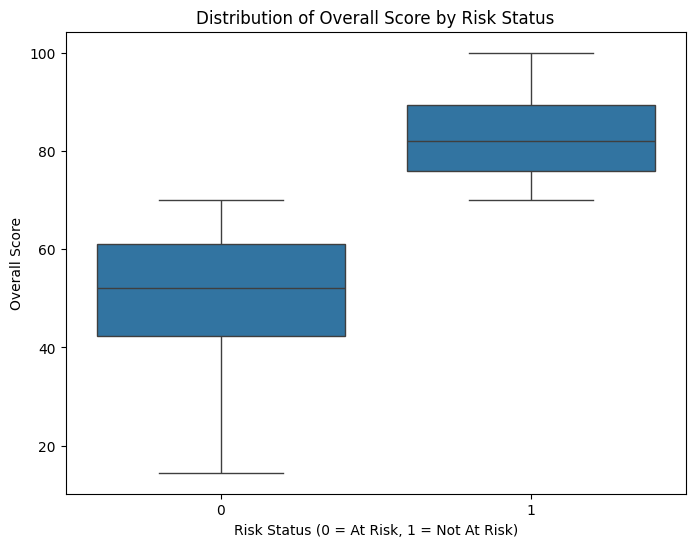

In [30]:
# Visualize Score-Risk Relationship
plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk', y='Overall_score', data=srms)
plt.title('Distribution of Overall Score by Risk Status')
plt.xlabel('Risk Status (0 = At Risk, 1 = Not At Risk)')
plt.ylabel('Overall Score')
plt.show()

In [31]:
# Convert categorical variables to numerical form.
categorical_cols = srms.select_dtypes(include='object').columns

encoder = LabelEncoder()
for col in categorical_cols:
    srms[col] = encoder.fit_transform(srms[col])

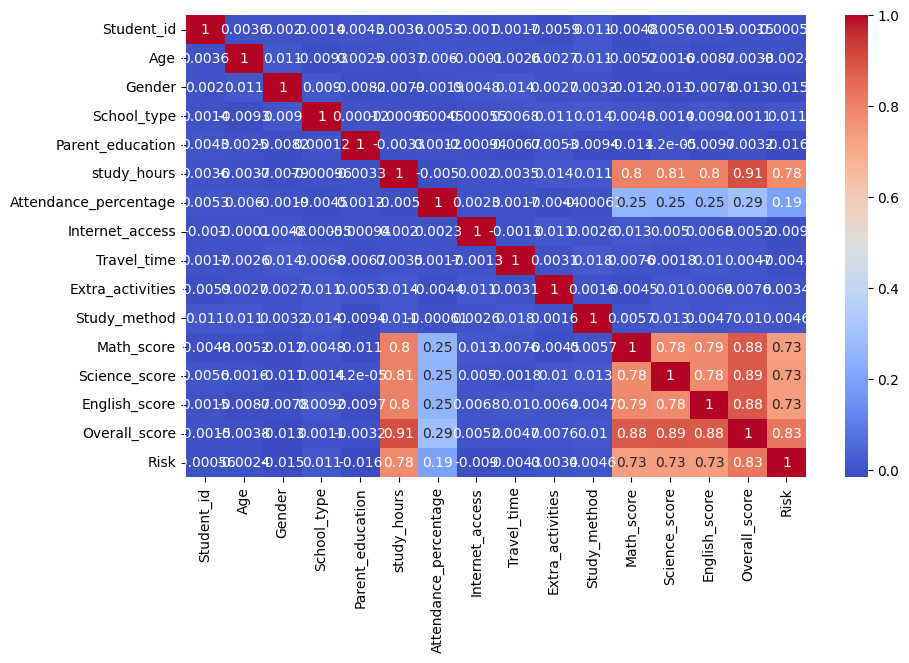

In [32]:
# Check correlations
plt.figure(figsize=(10,6))
sns.heatmap(srms.corr(), annot=True, cmap='coolwarm')
plt.show()

In [33]:
# Logistic Regression performs better with scaled features.
X = srms.drop(columns=['Risk'])
y = srms['Risk']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [35]:
# Model Building: Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Predictions/ evaluation
y_pred = model.predict(X_test)

In [37]:
# Performance Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9952
[[2993   11]
 [  13 1983]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3004
           1       0.99      0.99      0.99      1996

    accuracy                           1.00      5000
   macro avg       1.00      0.99      0.99      5000
weighted avg       1.00      1.00      1.00      5000



Interpretation:

Precision → How accurate risk predictions are

Recall → How many at-risk students were correctly identified (very important for intervention systems)

In [38]:
# Predicting Student Risk (System Usage)
# The 'new_student' array must have 15 features, matching the data the scaler was fitted on.
# Student_id was missing from the original array. A placeholder value (e.g., 0) is added.
new_student = np.array([[0, 18, 1, 2, 3, 5, 90, 1, 2, 1, 0, 64.008, 64.200, 63.681, 64.006]])
new_student_scaled = scaler.transform(new_student)

risk_prediction = model.predict(new_student_scaled)
risk_probability = model.predict_proba(new_student_scaled)

print("Risk Status:", "Not At Risk" if risk_prediction[0] == 1 else "At Risk")
print("Risk Probability:", risk_probability)

Risk Status: At Risk
Risk Probability: [[9.99025892e-01 9.74107505e-04]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
display(srms.describe())

,Student_id,Age,Gender,School_type,Parent_education,study_hours,Attendance_percentage,Internet_access,Travel_time,Extra_activities,Study_method,Math_score,Science_score,English_score,Overall_score,Risk
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,1.006920,0.491000,2.482800,4.253224,75.084084,0.849080,1.483880,0.50000,2.520720,63.785944,63.745320,63.681948,64.006172,0.402480
std,4323.56215,1.703895,0.818596,0.499929,1.717179,2.167541,14.373171,0.357978,1.118942,0.50001,1.700472,20.875262,20.970529,20.792693,18.932025,0.490407
min,1.00000,14.000000,0.000000,0.000000,0.000000,0.500000,50.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,14.500000,0.000000
25%,3743.75000,15.000000,0.000000,0.000000,1.000000,2.400000,62.800000,1.000000,0.000000,0.00000,1.000000,48.300000,48.200000,48.300000,49.000000,0.000000
50%,7461.50000,16.000000,1.000000,0.000000,2.000000,4.300000,75.100000,1.000000,1.000000,0.50000,3.000000,64.100000,64.100000,64.200000,64.200000,0.000000
75%,11252.00000,18.000000,2.000000,1.000000,4.000000,6.100000,87.500000,1.000000,2.000000,1.00000,4.000000,80.000000,80.000000,80.000000,79.000000,1.000000
max,15000.00000,19.000000,2.000000,1.000000,5.000000,8.000000,100.000000,1.000000,3.000000,1.00000,5.000000,100.000000,100.000000,100.000000,100.000000,1.000000


. Interpretation for SRMS

At Risk (0): Student flagged for academic intervention

Not At Risk (1): Student progressing normally

Probability score: Helps prioritize high-risk students